In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-prediction/seattle-weather.csv


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [117]:
df=pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [118]:
df.shape

(1461, 6)

<AxesSubplot: xlabel='weather', ylabel='count'>

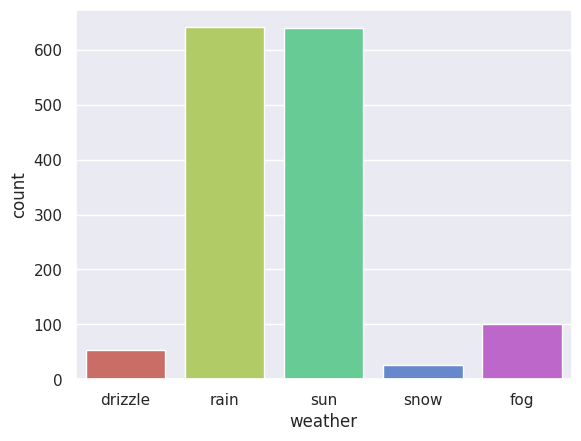

In [119]:
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather", data=df, palette='hls')

In [120]:
countrain=len(df[df.weather=='rain'])
countsun=len(df[df.weather=='sun'])
countdrizzle=len(df[df.weather=='drizzle'])
countsnow=len(df[df.weather=='snow'])
countfog=len(df[df.weather=='fog'])
countrain/(len(df.weather))*100,countsun/(len(df.weather))*100,countdrizzle/(len(df.weather))*100,countsnow/(len(df.weather))*100,countfog/(len(df.weather))*100

(43.87405886379192,
 43.80561259411362,
 3.6276522929500343,
 1.7796030116358659,
 6.913073237508556)

In [121]:
df[['precipitation'	,'temp_max',	'temp_min',	'wind']].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<AxesSubplot: xlabel='wind', ylabel='Count'>

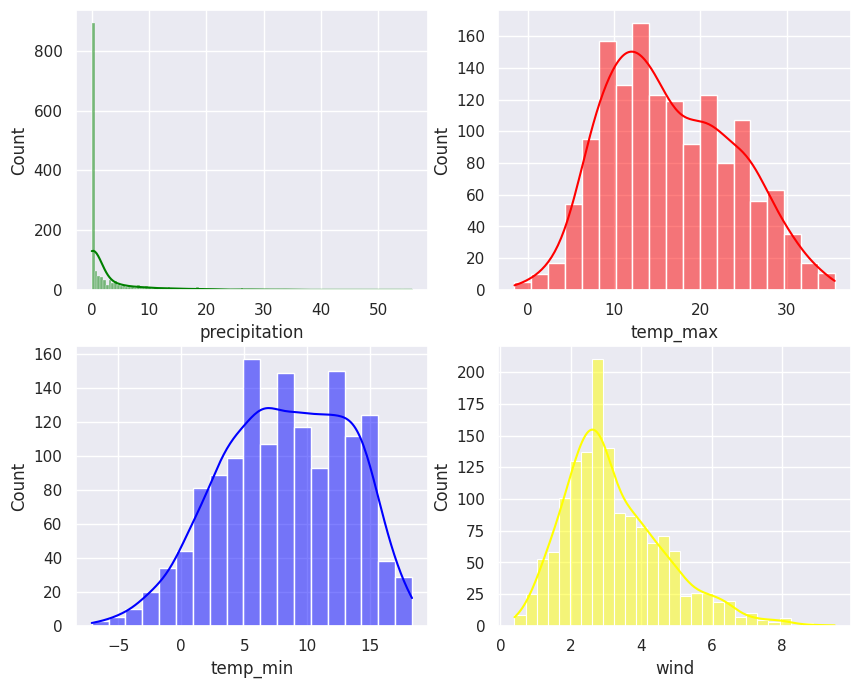

In [122]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df, x='precipitation',kde=True,ax=axs[0,0],color='green')

sns.histplot(data=df, x='temp_max',kde=True,ax=axs[0,1],color='red')

sns.histplot(data=df, x='temp_min',kde=True,ax=axs[1,0],color='blue')

sns.histplot(data=df, x='wind',kde=True,ax=axs[1,1],color='yellow')

In [123]:
# here the distribution shows it has outliers, we vcan plot a box plot and can remove the outliers

<AxesSubplot: xlabel='wind'>

Error in callback <function _draw_all_if_interactive at 0x7d3f4e7a43a0> (for post_execute):


KeyboardInterrupt: 

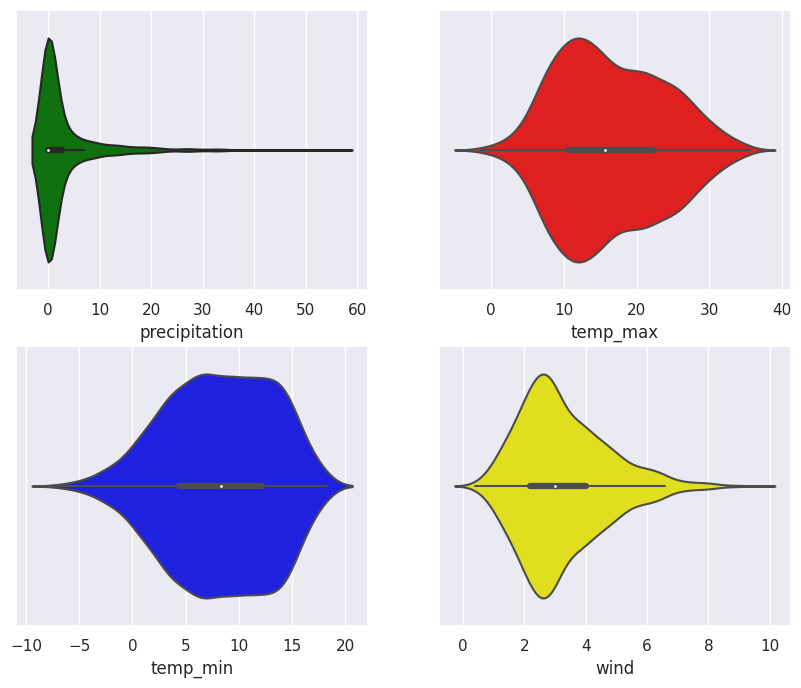

In [124]:
sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.violinplot(data=df, x='precipitation',kde=True,ax=axs[0,0],color='green')

sns.violinplot(data=df, x='temp_max',kde=True,ax=axs[0,1],color='red')

sns.violinplot(data=df, x='temp_min',kde=True,ax=axs[1,0],color='blue')

sns.violinplot(data=df, x='wind',kde=True,ax=axs[1,1],color='yellow')

<AxesSubplot: xlabel='precipitation', ylabel='weather'>

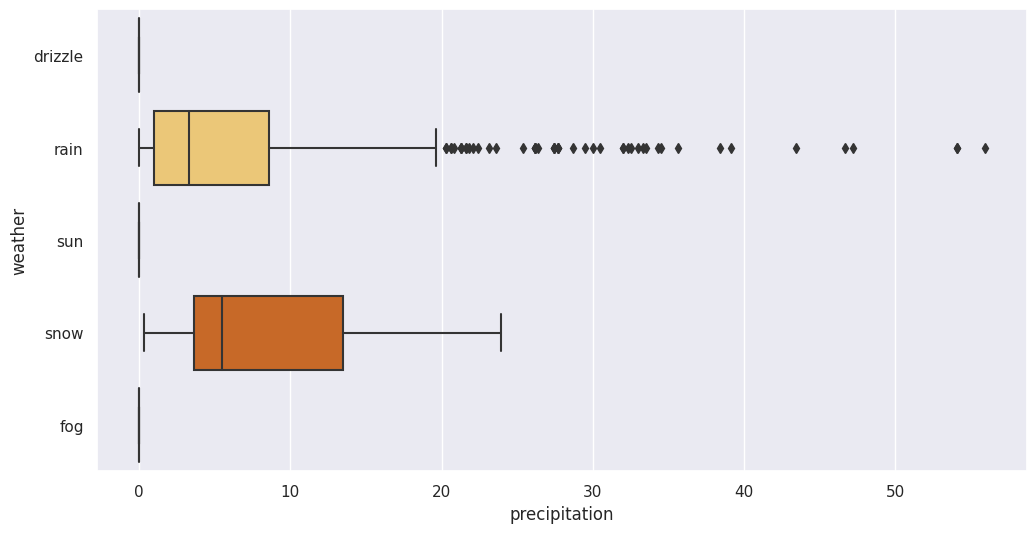

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(x='precipitation', y='weather', data=df, palette='YlOrBr')

<AxesSubplot: xlabel='temp_max', ylabel='weather'>

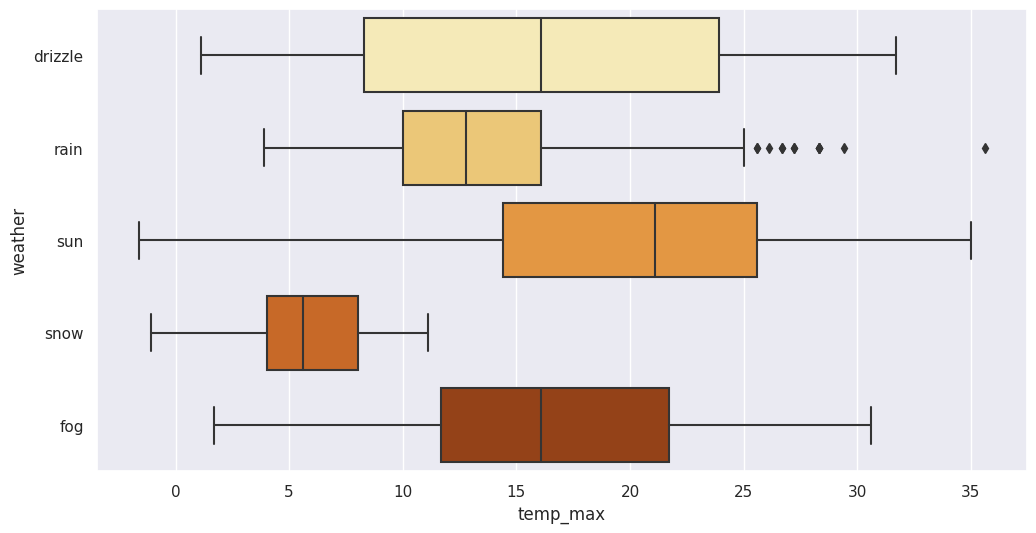

In [126]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_max', y='weather', data=df, palette='YlOrBr')

<AxesSubplot: xlabel='temp_min', ylabel='weather'>

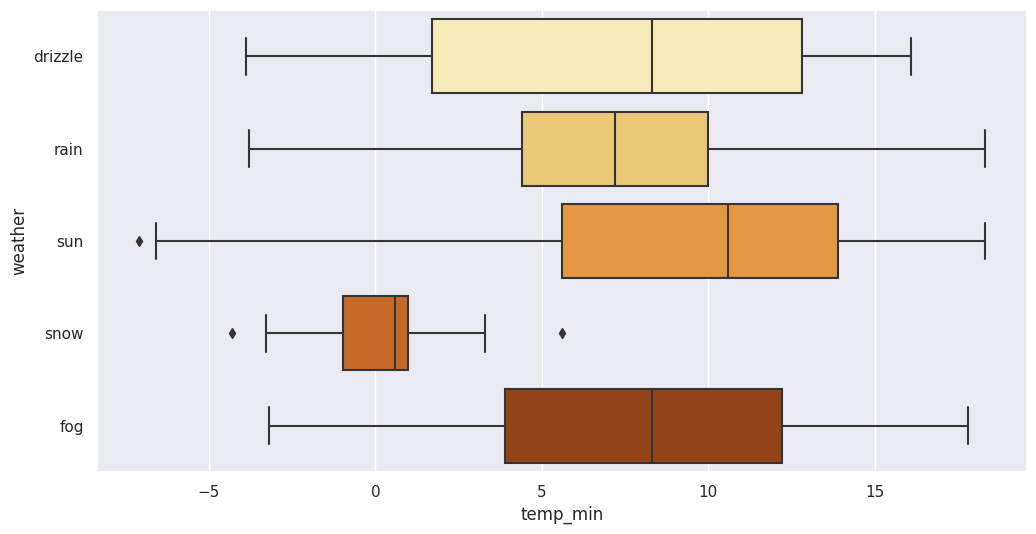

In [127]:
plt.figure(figsize=(12,6))
sns.boxplot(x='temp_min', y='weather', data=df, palette='YlOrBr')

<AxesSubplot: xlabel='wind', ylabel='weather'>

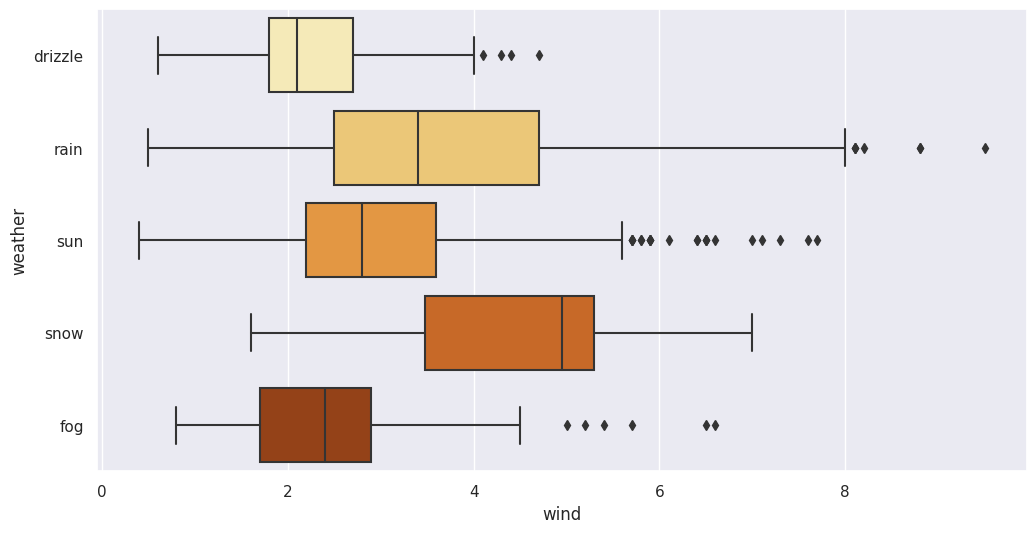

In [128]:
plt.figure(figsize=(12,6))
sns.boxplot(x='wind', y='weather', data=df, palette='YlOrBr')

<AxesSubplot: >

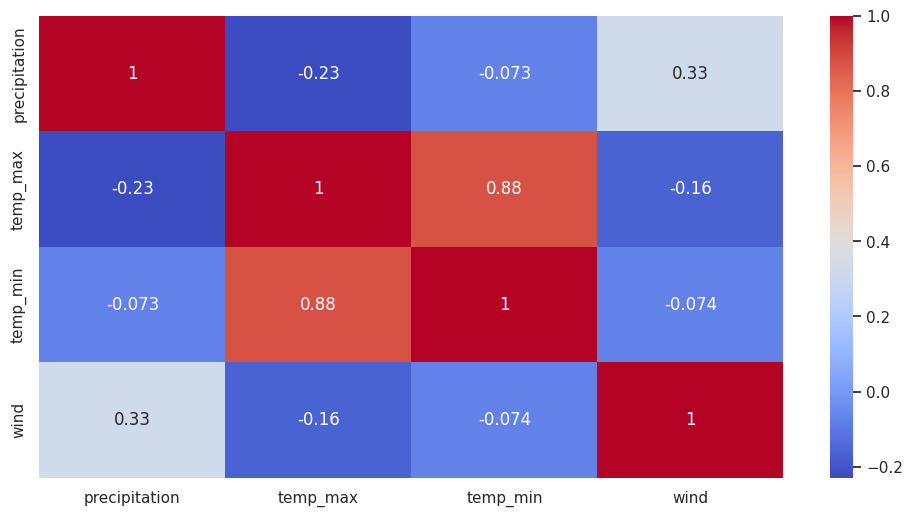

In [129]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [130]:
#there is a positive relation between temp_min and temp_max(0.88), whihc means any changes in temp_min will be same for temp_max alsso


pearson correlation :  -0.22855481643297046
T test and P value :  Ttest_indResult(statistic=-51.60685279531918, pvalue=0.0)


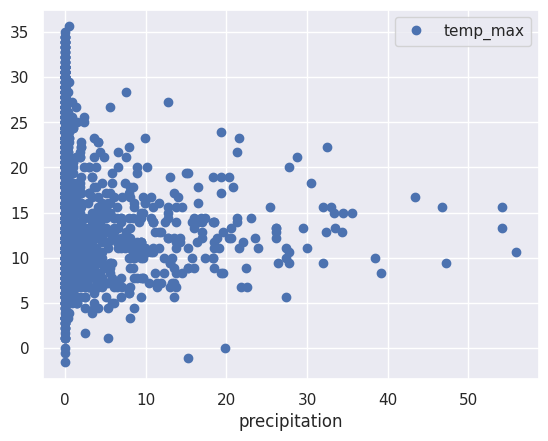

In [131]:
df.plot("precipitation","temp_max", style='o')
print('pearson correlation : ', df['precipitation'].corr(df['temp_max']))
print('T test and P value : ', stats.ttest_ind(df['precipitation'],df['temp_max']))

pearson correlation :  -0.16485663487495486
T test and P value :  Ttest_indResult(statistic=-67.3601643301846, pvalue=0.0)


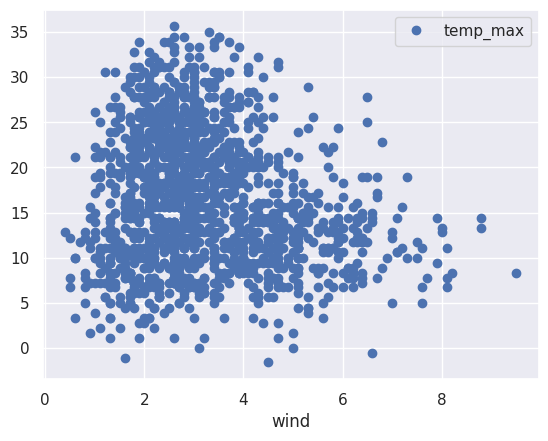

In [132]:
df.plot("wind","temp_max", style='o')
print('pearson correlation : ', df['wind'].corr(df['temp_max']))
print('T test and P value : ', stats.ttest_ind(df['wind'],df['temp_max']))

<AxesSubplot: xlabel='temp_max'>

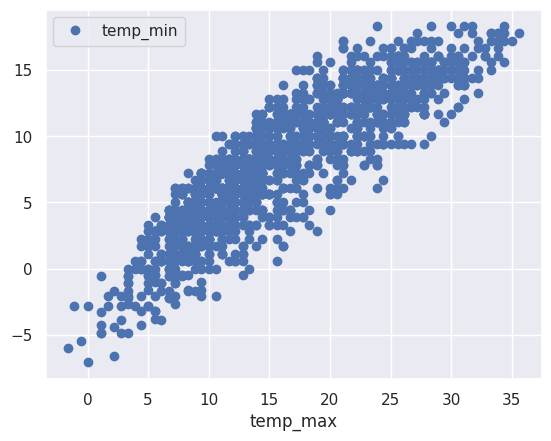

In [133]:
df.plot('temp_max', 'temp_min', style='o')

In [134]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<AxesSubplot: >

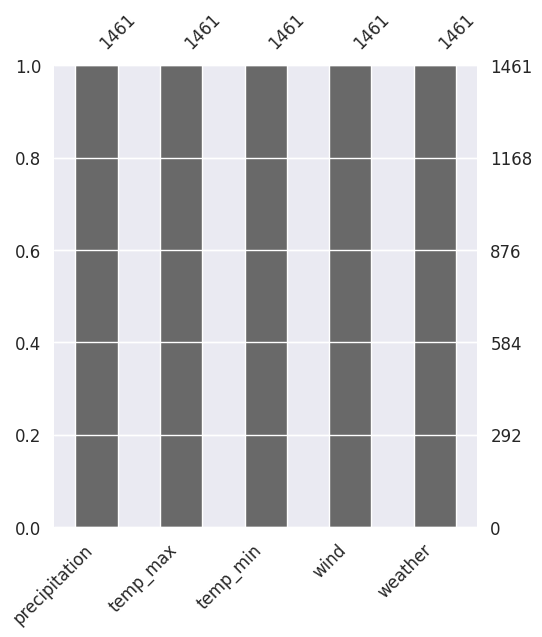

In [135]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1,2,2)
mso.bar(df.drop(['date'],axis=1),ax=axz,fontsize=12)

In [136]:
df=df.drop(['date'],axis=1)

In [137]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [138]:
import numpy as np

In [139]:
df.precipitation=np.sqrt(df.precipitation)
df.wind = np.sqrt(df.wind)

<AxesSubplot: xlabel='wind', ylabel='Count'>

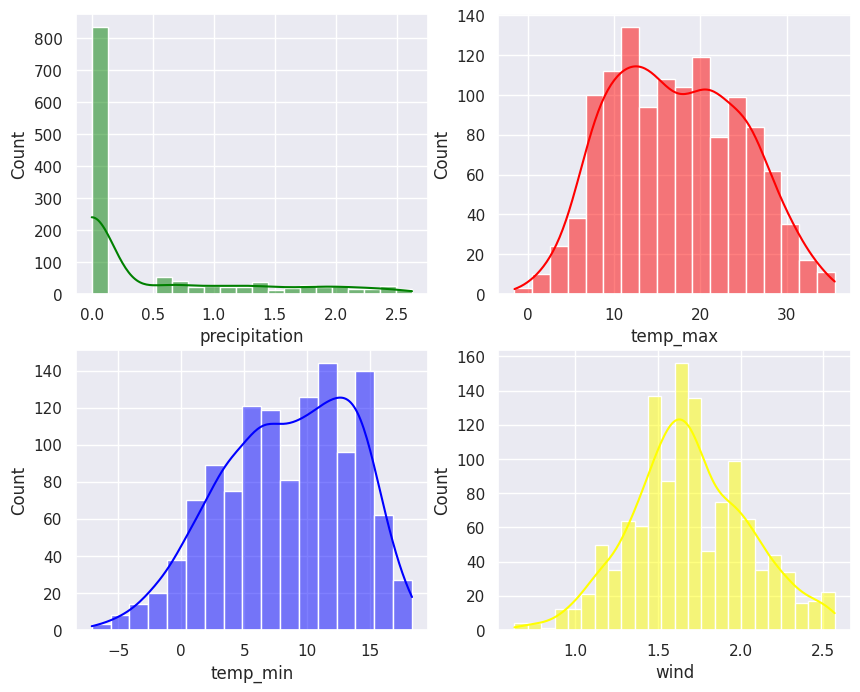

In [140]:
 sns.set(style='darkgrid')
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df, x='precipitation',kde=True,ax=axs[0,0],color='green')

sns.histplot(data=df, x='temp_max',kde=True,ax=axs[0,1],color='red')

sns.histplot(data=df, x='temp_min',kde=True,ax=axs[1,0],color='blue')

sns.histplot(data=df, x='wind',kde=True,ax=axs[1,1],color='yellow')

In [141]:
# In the case of the precipitation and wind columns, 
# it's possible that the original values were measured on a 
# scale that had a nonlinear relationship with the weather
# phenomenon being measured. Taking the square root of the 
# values could help to linearize this relationship and make
# the data more suitable for certain types of statistical 
# models or analyses. and the relation of other attributes are leniearise and doesn't requires scaling so we did'nt square root them

In [142]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
2,0.894427,11.7,7.2,1.516575,rain
4,1.140175,8.9,2.8,2.469818,rain
5,1.581139,4.4,2.2,1.483240,rain
6,0.000000,7.2,2.8,1.516575,rain


In [143]:
lc=LabelEncoder()
df['weather']=lc.fit_transform(df['weather'])

In [144]:
df.tail()

,precipitation,temp_max,temp_min,wind,weather
1455,0.000000,4.4,0.0,1.581139,4
1457,1.224745,5.0,1.7,1.140175,2
1458,0.000000,7.2,0.6,1.612452,1
1459,0.000000,5.6,-1.0,1.843909,4
1460,0.000000,5.6,-2.1,1.870829,4


In [145]:
df['weather'].unique()

array([0, 2, 4, 3, 1])

In [146]:
x=((df.loc[:,df.columns!='weather']).astype(int)).values[:,0:]
y=df['weather'].values

In [147]:
df.weather.unique() #labels assigned to the weather column like dizzle-0, etc

array([0, 2, 4, 3, 1])

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=2)

In [149]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('KNN accuracy:{:.2f}%' .format(knn.score(x_test,y_test)*100))

KNN accuracy:85.48%


In [150]:
svm=SVC()
svm.fit(x_train,y_train)
print('SVM accuracy:{:.2f}%' .format(svm.score(x_test,y_test)*100))

SVM accuracy:83.87%


In [151]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print('After Gradient Boosting accuracy:{:.2f}%' .format(gbc.score(x_test,y_test)*100))

After Gradient Boosting accuracy:91.94%


In [152]:
import warnings
warnings.filterwarnings('ignore')
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print('After Extreme Gradient Boosting accuracy:{:.2f}%' .format(xgb.score(x_test,y_test)*100))

After Extreme Gradient Boosting accuracy:93.55%


In [158]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb.predict(input)
print('the weather is:')
if(ot==0):
  print('Drizzle')
elif (ot==1):
  print('fogg')
elif (ot==2):
  print('rain')
elif (ot==3):
  print('snow')
else:
  print('sun')
     

the weather is:
rain
